In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

# classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Functions



In [176]:
def plot_cm(actual, prediction):
    cm = confusion_matrix(actual, prediction)
    # Visualize confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Set2_r', fmt='g', ax=ax)

    # Set axis labels and title
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.tight_layout()



## Load Datasets

### Original Dataset

In [177]:
X = df = pd.read_csv(r'./../data/X.csv')
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1


In [178]:
X.shape

(17976, 20)

In [179]:
y = df = pd.read_csv(r'./../data/y.csv')
y.head()

,offer_accepted
0,No
1,No
2,No
3,No
4,No


In [180]:
y_int = pd.Series(y.offer_accepted)
y_int.unique()

array(['No', 'Yes'], dtype=object)

In [181]:
y_int = y_int.apply(lambda x: 0 if x == 'No' else 1)
y_int

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: offer_accepted, Length: 17976, dtype: int64

In [182]:
y_int.value_counts()

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

In [183]:
y_int.unique()

array([0, 1])

### X Variations

In [184]:
X_avgbal = X.drop(columns=(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']))
X_avgbal

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,5,167.50,2,0,0,1,0,1,0,1,0,0,1
17972,1,3,1,3,850.50,2,0,0,1,0,1,0,1,0,0,1
17973,1,2,1,4,1087.25,2,0,0,1,0,1,0,1,0,1,0
17974,1,4,2,2,1022.25,1,1,0,1,0,1,0,1,0,0,1


In [185]:
X_qr = X.drop('average_balance', axis=1)
X_qr

,bank_accounts_open,credit_cards_held,homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,5,136.0,65.0,71.0,398.0,2,0,0,1,0,1,0,1,0,0,1
17972,1,3,1,3,984.0,940.0,943.0,535.0,2,0,0,1,0,1,0,1,0,0,1
17973,1,2,1,4,918.0,767.0,1170.0,1494.0,2,0,0,1,0,1,0,1,0,1,0
17974,1,4,2,2,626.0,983.0,865.0,1615.0,1,1,0,1,0,1,0,1,0,0,1


### SMOTE dataset

In [186]:
smote_data = pd.read_csv(r'./../data/oversampled_data.csv')

In [187]:
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33910 entries, 0 to 33909
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bank_accounts_open        33910 non-null  float64
 1   credit_cards_held         33910 non-null  float64
 2   homes_owned               33910 non-null  float64
 3   household_size            33910 non-null  float64
 4   average_balance           33910 non-null  float64
 5   q1_balance                33910 non-null  float64
 6   q2_balance                33910 non-null  float64
 7   q3_balance                33910 non-null  float64
 8   q4_balance                33910 non-null  float64
 9   income_level              33910 non-null  float64
 10  credit_rating             33910 non-null  float64
 11  reward_Air Miles          33910 non-null  float64
 12  reward_Cash Back          33910 non-null  float64
 13  reward_Points             33910 non-null  float64
 14  mailer

In [188]:
X_sm = smote_data.drop('offer_accepted', axis=1)
X_sm

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,-0.007894,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,0.365992,1.406778,1.171654,-2.006040,-1.383443,-1.399945,-1.216592,-1.143719,-1.144176,0.230839,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744
33906,-0.541352,0.121161,-0.476212,-1.339703,0.509354,-0.090918,1.061438,0.733175,-0.216821,-1.420373,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
33907,-0.541352,-0.742960,-0.476212,-1.345162,0.100980,1.500388,0.608086,-0.670130,-1.245289,-0.445548,-0.850492,-0.711980,1.413683,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352
33908,-0.541352,0.121161,-0.476212,0.207690,0.117587,0.101837,0.098037,-0.168242,0.268133,0.376295,-0.337504,-0.711980,-0.707372,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744


In [189]:
y_sm = smote_data.iloc[:, -1]
y_sm = y_sm.map({'No': 0, 'Yes': 1})
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
33905    1
33906    1
33907    1
33908    1
33909    1
Name: offer_accepted, Length: 33910, dtype: int64

### Add random variable in X
- This variable will be useful when checking for feature importance. Every variable below it could most likely be dropped.

In [190]:
X['random'] = np.random.random(size=len(X))
X_avgbal['random'] = np.random.random(size=len(X_avgbal))
X_qr['random'] = np.random.random(size=len(X_qr))
X_sm['random'] = np.random.random(size=len(X_sm))

X_train['random'] = np.random.random(size=len(X_train))
Xavg_train['random'] = np.random.random(size=len(Xavg_train))
Xqr_train['random'] = np.random.random(size=len(Xqr_train))
Xsm_train['random'] = np.random.random(size=len(Xsm_train))


### X-y Split : Original Dataset

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.3, random_state=100)

In [192]:
y_train.value_counts()

offer_accepted
0    11862
1      721
Name: count, dtype: int64

In [193]:
y_test.value_counts()

offer_accepted
0    5093
1     300
Name: count, dtype: int64

### X-y Split : X Variations (For Logistic Regression)

In [194]:
Xavg_train, Xavg_test, yavg_train, yavg_test = train_test_split(X_avgbal, y_int, test_size=0.3, random_state=100) # no quarterly balance
Xqr_train, Xqr_test, yqr_train, yqr_test = train_test_split(X_qr, y_int, test_size=0.3, random_state=100) # no quarterly balance

### X-y Split : SMOTE Dataset

In [195]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [196]:
ysm_train.value_counts()

offer_accepted
1    11926
0    11811
Name: count, dtype: int64

In [197]:
ysm_test.value_counts()

offer_accepted
0    5144
1    5029
Name: count, dtype: int64

## Logistic Regression

In [198]:
def fit_classifier(X, y, model_type):
    '''choose model to apply
    'logistic_b' : classification binomial logistic regression
    'logistic_m' : classification multinomial logistic regression
    'knn' : k nearest neighbor classifier'''
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    if model_type == 'logistic_b':
        model = LogisticRegression(random_state=1, multi_class='ovr')
    elif model_type == 'logistic_m':
        model = LogisticRegression(random_state=1, multi_class='multinomial')
    elif model_type == "knn":
        k = int(input("k="))
        w = str(input("uniform or distance?"))
        model = KNeighborsClassifier(n_neighbors=k, weights=w)
    else:
        None
    
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    summary = pd.DataFrame(np.abs(importance.round(2)), columns=['importance'], index=X.columns)
    summary = summary.sort_values('importance', ascending=False)
    prediction = model.predict(X_test)
    return prediction, summary


In [199]:
log_pred, importance_log = fit_classifier(X, y_int, 'logistic_b')
importance_log

,importance
credit_rating,0.95
mailer_type_Letter,0.58
income_level,0.51
reward_Cash Back,0.48
mailer_type_Postcard,0.37
reward_Air Miles,0.26
homes_owned,0.19
bank_accounts_open,0.17
own_your_home_Yes,0.16
overdraft_protection_No,0.15


In [200]:
log_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [201]:
def plot_importance(list):
    plt.figure(figsize=(18,8))
    plt.suptitle('Feature Importance Scores', y=0.95)
    plot = sns.barplot(x = list, y = list.index)
    return plot

In [202]:
# Logistic Regression Feature Importance Scores
plot_importance(importance_log)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1800x800 with 0 Axes>

In [ ]:
def metrics_class(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc_score = roc_auc_score(actual, predicted)
    
    index = ['Cohen Kappa Score', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC Score']
    metrics = pd.Series([kappa, accuracy, precision, recall, f1, auc_score], index=index)
    return metrics.round(2)


In [ ]:
metrics_class(y_test, log_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

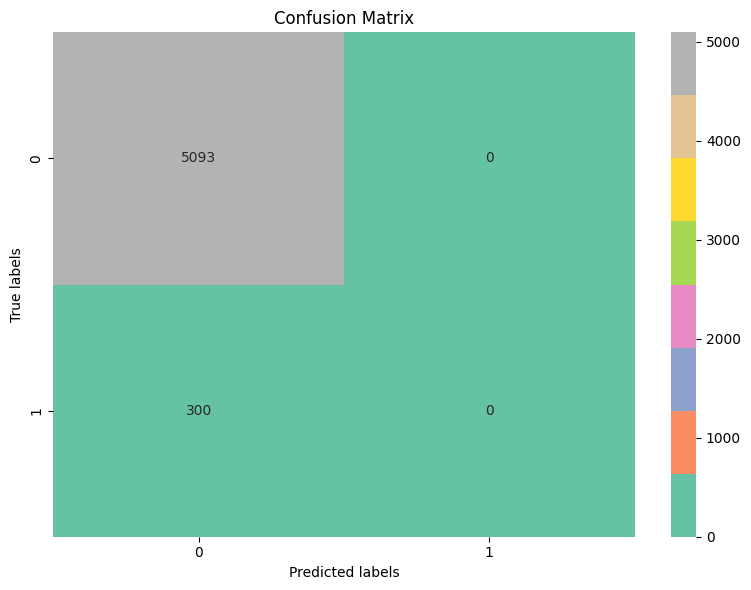

In [ ]:
plot_cm(y_test, log_pred)

#### Logistic Regression with average_balance

In [ ]:
log_pred_avg, importance_log_avg = fit_classifier(X_avgbal, y_int, 'logistic_b')
importance_log_avg

,importance
credit_rating,0.91
reward_Cash Back,0.69
mailer_type_Letter,0.64
income_level,0.48
reward_Air Miles,0.28
mailer_type_Postcard,0.27
own_your_home_Yes,0.24
overdraft_protection_No,0.21
overdraft_protection_Yes,0.16
own_your_home_No,0.13


<Axes: xlabel='importance'>

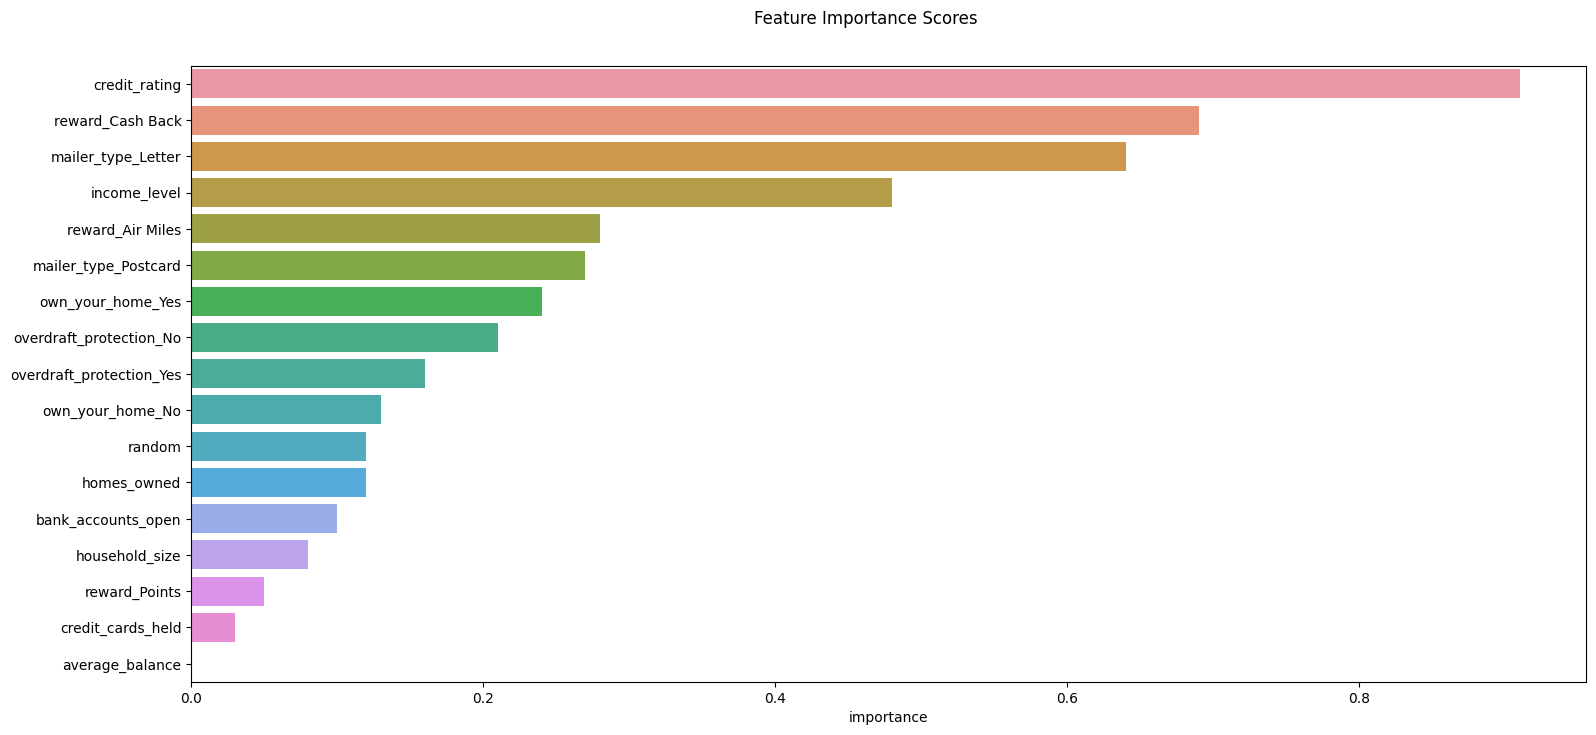

In [ ]:
plot_importance(importance_log_avg)

In [ ]:
metrics_class(y_test, log_pred_avg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

In [ ]:
plot_cm(y_test, log_pred_avg)

#### Logistic Regression with quarterly balance

In [ ]:
log_pred_qr, importance_log_qr = fit_classifier(X_qr, y_int, 'logistic_b')
importance_log_qr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.98
mailer_type_Letter,0.61
income_level,0.53
reward_Cash Back,0.51
mailer_type_Postcard,0.38
reward_Air Miles,0.27
homes_owned,0.19
bank_accounts_open,0.18
own_your_home_Yes,0.17
overdraft_protection_No,0.15


<Axes: xlabel='importance'>

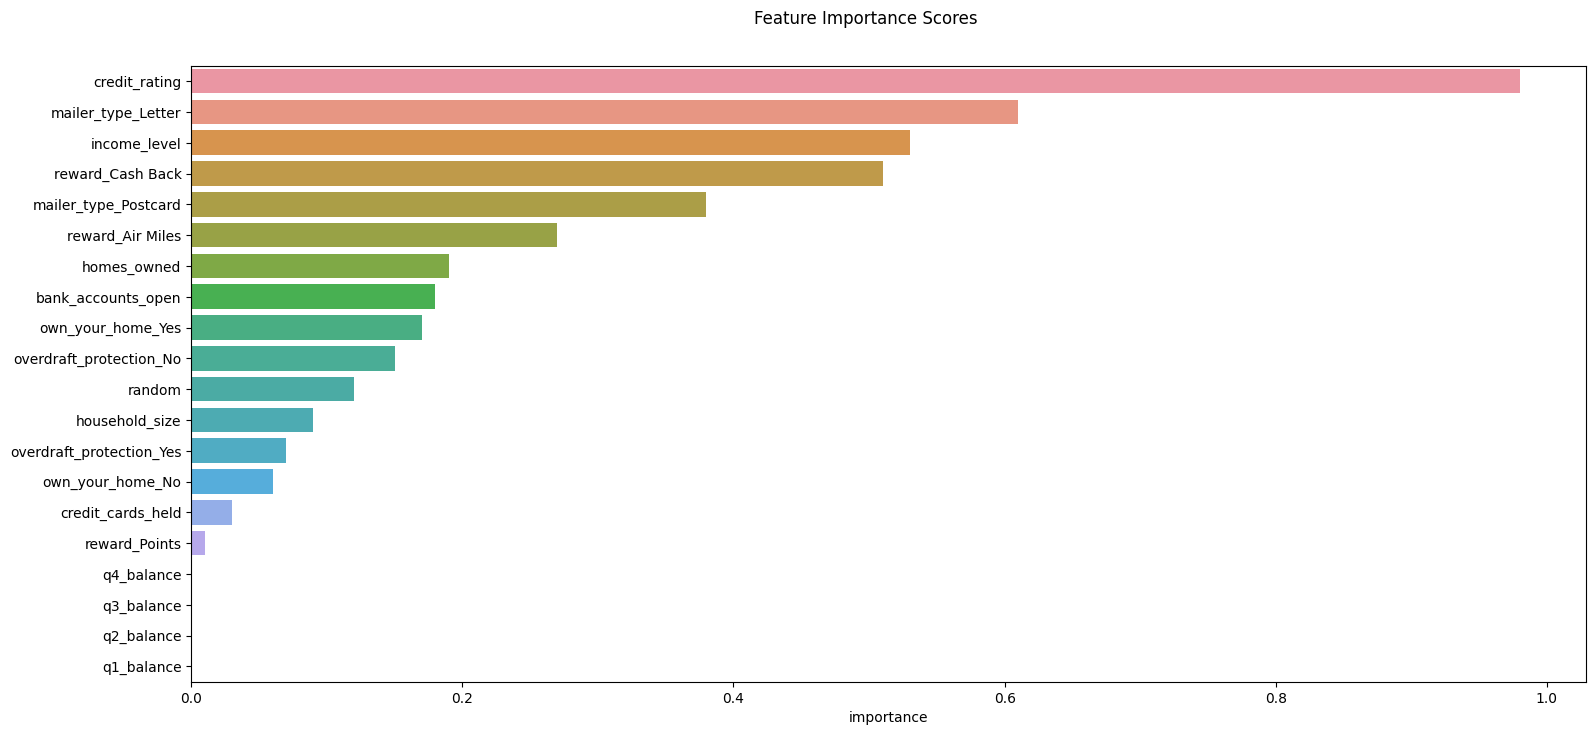

In [ ]:
plot_importance(importance_log_qr)

In [ ]:
metrics_class(y_test, log_pred_qr)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

In [ ]:
plot_cm(y_test, log_pred_qr)

#### Logistic Regression with SMOTE

In [ ]:
sm_log_pred, sm_importance_log = fit_classifier(X_sm, y_sm, 'logistic_b')
sm_importance_log

,importance
credit_rating,0.90
income_level,0.47
reward_Cash Back,0.32
reward_Air Miles,0.26
mailer_type_Postcard,0.25
mailer_type_Letter,0.25
q1_balance,0.12
bank_accounts_open,0.07
q2_balance,0.07
reward_Points,0.06


In [ ]:
metrics_class(ysm_test, sm_log_pred)

Cohen Kappa Score    0.41
Accuracy             0.70
Precision            0.69
Recall               0.75
F1                   0.71
AUC Score            0.71
dtype: float64

In [ ]:
plot_cm(ysm_test, sm_log_pred)

<Axes: xlabel='importance'>

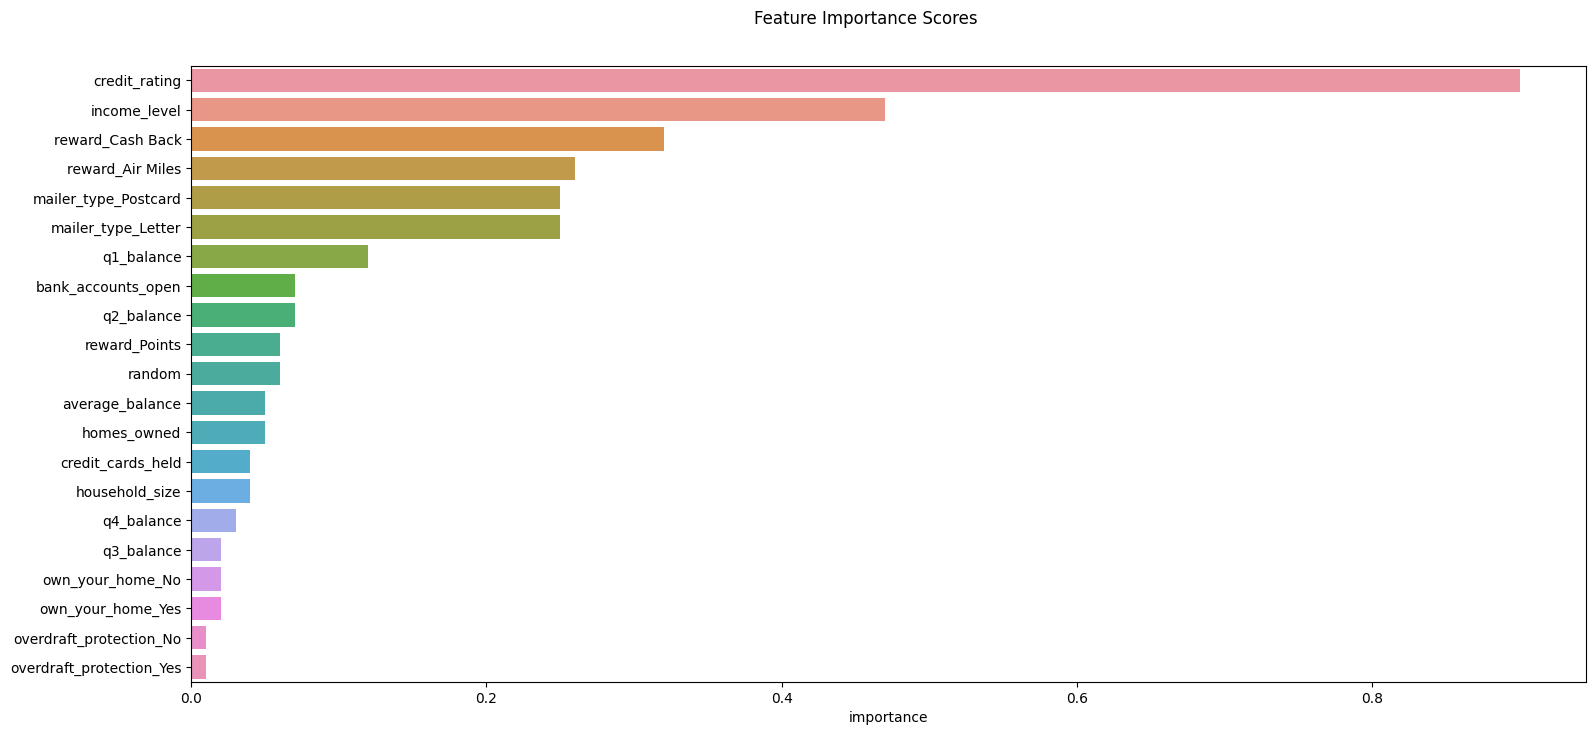

In [ ]:
plot_importance(sm_importance_log)

### Decision Tree Classifier Model

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [ ]:
metrics_class(y_test, dt_pred)

Cohen Kappa Score    0.03
Accuracy             0.89
Precision            0.08
Recall               0.09
F1                   0.09
AUC Score            0.52
dtype: float64

In [ ]:
plot_cm(y_test, dt_pred)

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
dt_entropy_pred = dt_entropy.predict(X_test)

In [ ]:
metrics_class(y_test, dt_entropy_pred)

Cohen Kappa Score    0.07
Accuracy             0.90
Precision            0.12
Recall               0.13
F1                   0.12
AUC Score            0.54
dtype: float64

In [ ]:
plot_cm(y_test, dt_entropy_pred)

In [ ]:
def importance(model):
    importances = pd.DataFrame(data=model.feature_importances_,
                        index= X_train.columns)
    importances_sorted = importances.iloc[:,0].sort_values(ascending=False)
    #importances_sorted = importances.sort_values('importance', ascending=False).round(3)
    return importances_sorted

In [ ]:
importance_dt = importance(dt)
importance_dt

credit_rating               0.365953
income_level                0.152601
credit_cards_held           0.065298
household_size              0.060744
q4_balance                  0.046564
q2_balance                  0.045418
q1_balance                  0.040783
average_balance             0.037327
q3_balance                  0.036191
mailer_type_Letter          0.027011
reward_Cash Back            0.024299
homes_owned                 0.019610
random                      0.017907
bank_accounts_open          0.015216
reward_Air Miles            0.012882
reward_Points               0.009747
mailer_type_Postcard        0.007652
own_your_home_No            0.004787
overdraft_protection_Yes    0.003880
own_your_home_Yes           0.003304
overdraft_protection_No     0.002824
Name: 0, dtype: float64

<Axes: xlabel='0'>

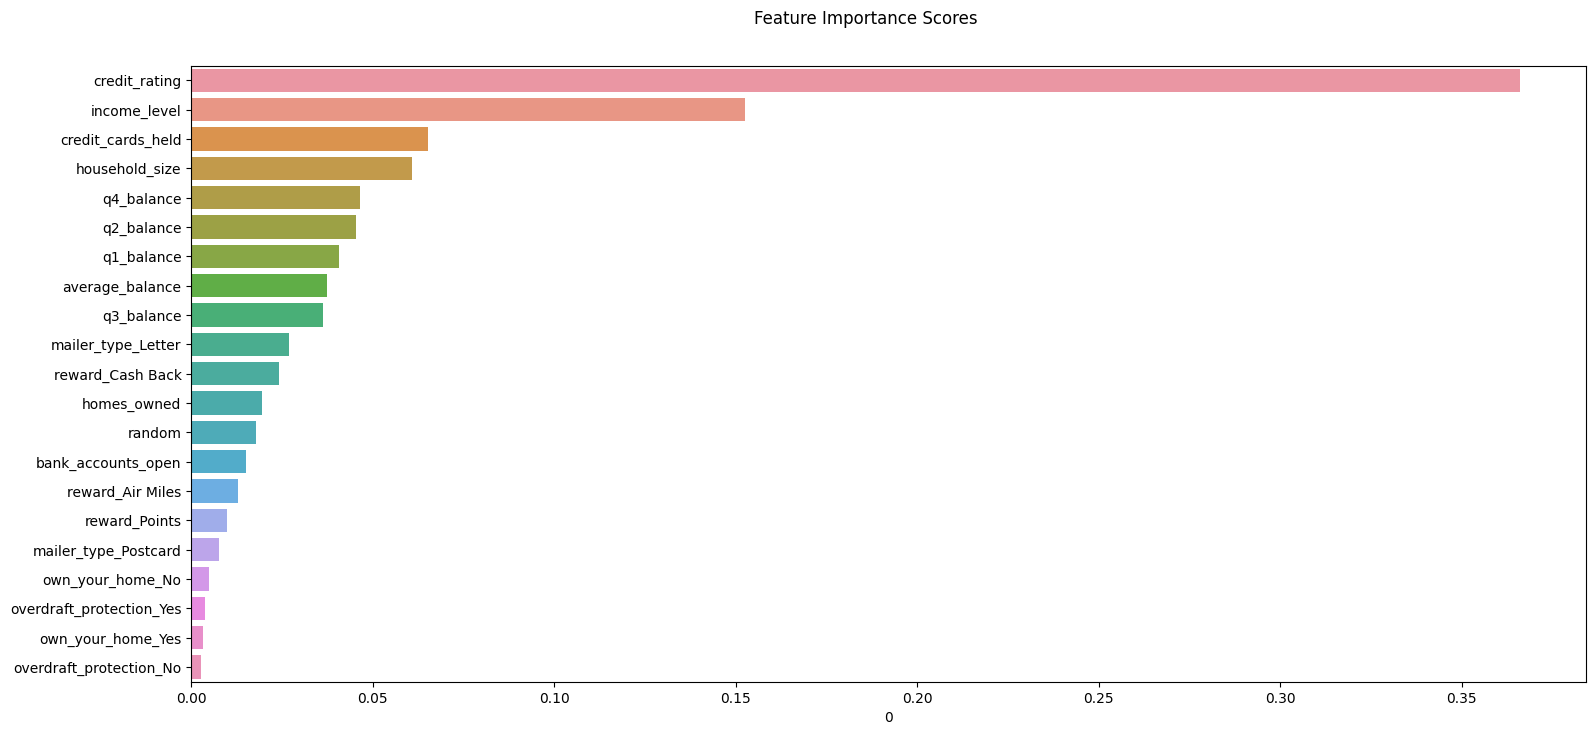

In [ ]:
plot_importance(importance_dt)

In [ ]:
imp_dt_ent = importance(dt_entropy)
imp_dt_ent

credit_rating               0.326244
income_level                0.155542
household_size              0.068196
credit_cards_held           0.060185
q2_balance                  0.051823
q4_balance                  0.051088
q3_balance                  0.044810
q1_balance                  0.043920
average_balance             0.039071
reward_Cash Back            0.026766
homes_owned                 0.022474
mailer_type_Postcard        0.019946
random                      0.019077
reward_Air Miles            0.014672
bank_accounts_open          0.013328
mailer_type_Letter          0.012758
reward_Points               0.010668
own_your_home_Yes           0.006324
overdraft_protection_No     0.005795
own_your_home_No            0.004542
overdraft_protection_Yes    0.002770
Name: 0, dtype: float64

<Axes: xlabel='0'>

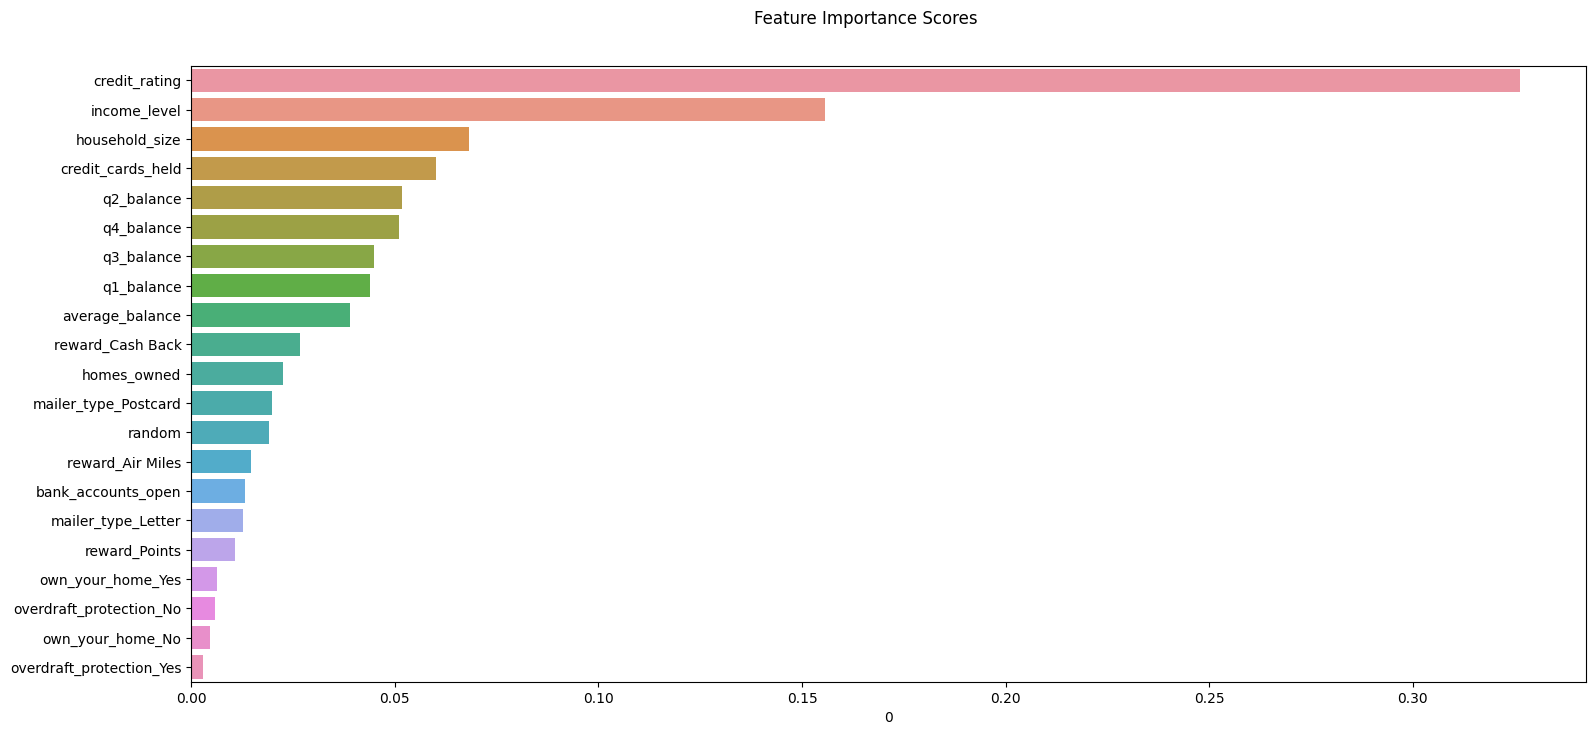

In [ ]:
plot_importance(imp_dt_ent)

#### With SMOTE Dataset

In [ ]:
dt.fit(Xsm_train, ysm_train)
sm_dt_pred = dt.predict(Xsm_test)

In [ ]:
sm_dt_impt = importance(dt)
sm_dt_impt

,importance
credit_rating,0.366
income_level,0.153
credit_cards_held,0.065
household_size,0.061
q4_balance,0.047
q2_balance,0.045
q1_balance,0.041
average_balance,0.037
q3_balance,0.036
mailer_type_Letter,0.027


<Axes: xlabel='importance'>

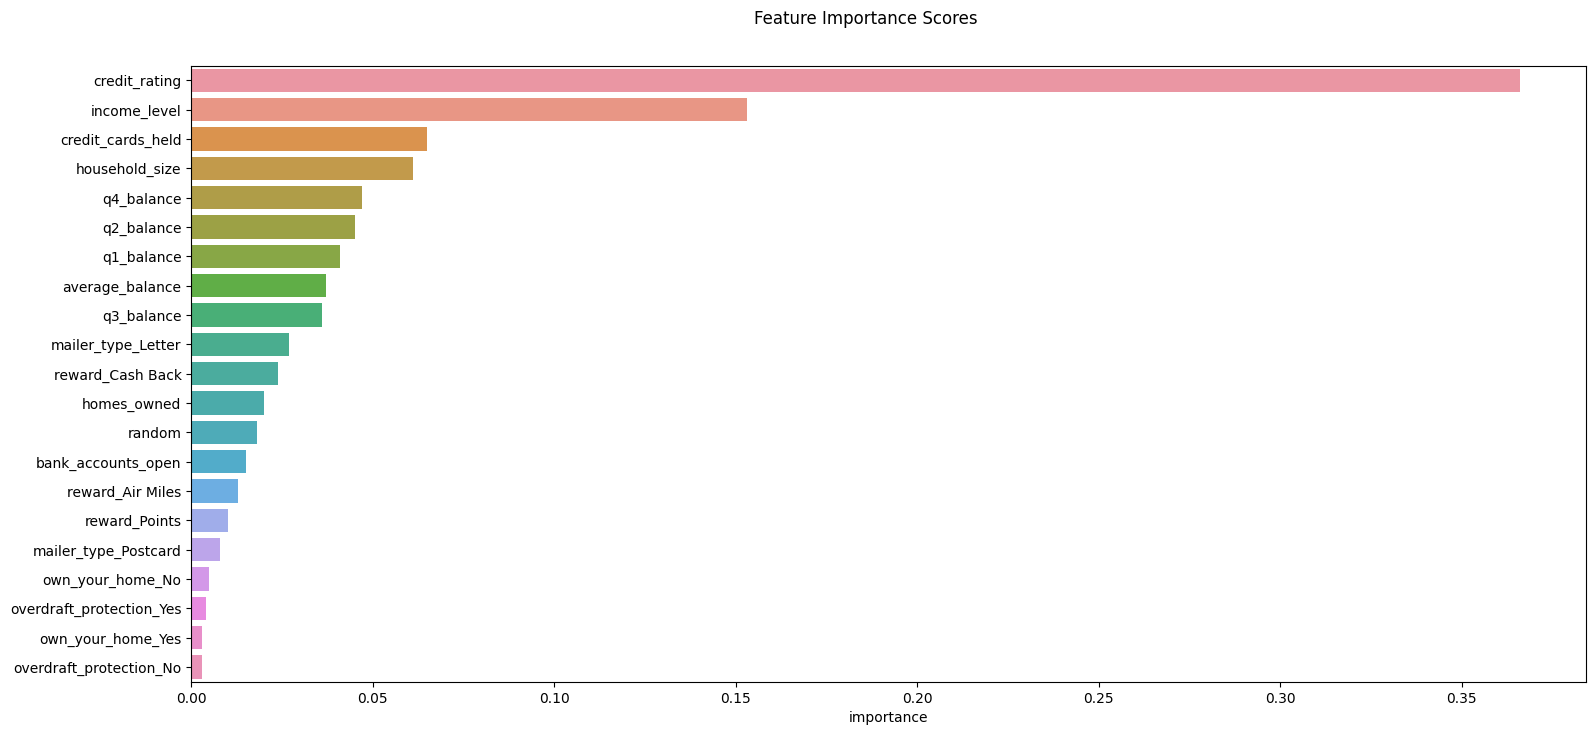

In [ ]:
plot_importance(sm_dt_impt)

In [ ]:
metrics_class(ysm_test, sm_dt_pred)

Cohen Kappa Score    0.85
Accuracy             0.92
Precision            0.91
Recall               0.93
F1                   0.92
AUC Score            0.92
dtype: float64

In [ ]:
plot_cm(ysm_test, sm_dt_pred)

In [ ]:
dt_entropy.fit(Xsm_train, ysm_train)
sm_dt_entropy_pred = dt_entropy.predict(Xsm_test)

In [ ]:
sm_dtent_impt = importance(dt_entropy)
sm_dtent_impt


,importance
credit_rating,0.326
income_level,0.156
household_size,0.068
credit_cards_held,0.060
q2_balance,0.052
q4_balance,0.051
q3_balance,0.045
q1_balance,0.044
average_balance,0.039
reward_Cash Back,0.027


<Axes: xlabel='importance'>

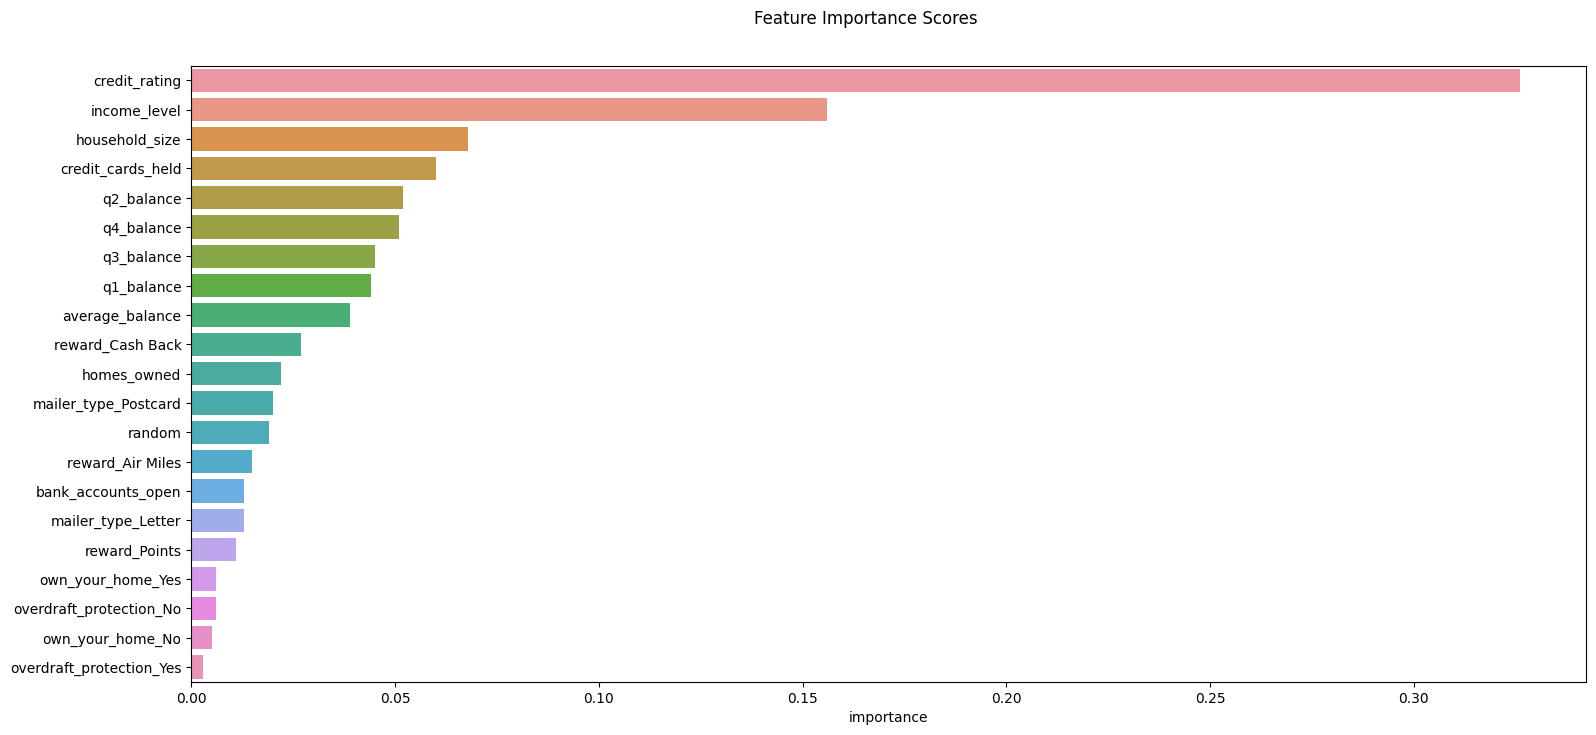

In [ ]:
plot_importance(sm_dtent_impt)

In [ ]:
metrics_class(ysm_test, sm_dt_entropy_pred)

Cohen Kappa Score    0.85
Accuracy             0.93
Precision            0.92
Recall               0.93
F1                   0.93
AUC Score            0.93
dtype: float64

In [ ]:
plot_cm(ysm_test, sm_dt_entropy_pred)

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)
rf.fit(X_train,y_train)
print('Training Accuracy Score: {:.2f} \nOOB Score: {:.2f} \nValidation Accuracy Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

rf_pred = rf.predict(X_test)

Training Accuracy Score: 1.00 
OOB Score: 0.94 
Validation Accuracy Score: 0.94


In [ ]:
rf_metrics = metrics_class(y_test, rf_pred)
rf_metrics

Cohen Kappa Score   -0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

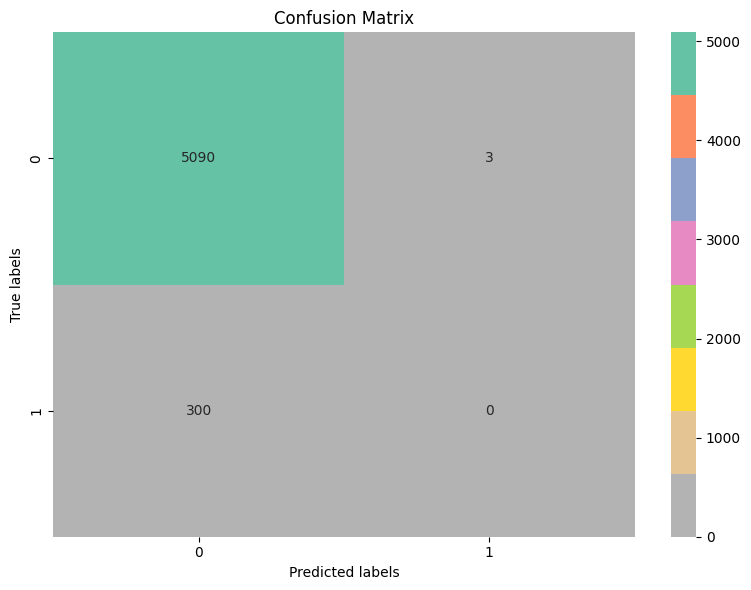

In [ ]:
plot_cm(y_test, rf_pred)

In [ ]:
def baseline_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred).round(3)


In [ ]:
baseline_accuracy(rf, X_test, y_test)

0.944

In [ ]:
imp_rf = importance(rf)
imp_rf

,importance
random,0.126
q3_balance,0.125
q2_balance,0.122
q1_balance,0.120
q4_balance,0.119
average_balance,0.118
household_size,0.051
credit_rating,0.036
credit_cards_held,0.034
income_level,0.026


<Axes: xlabel='importance'>

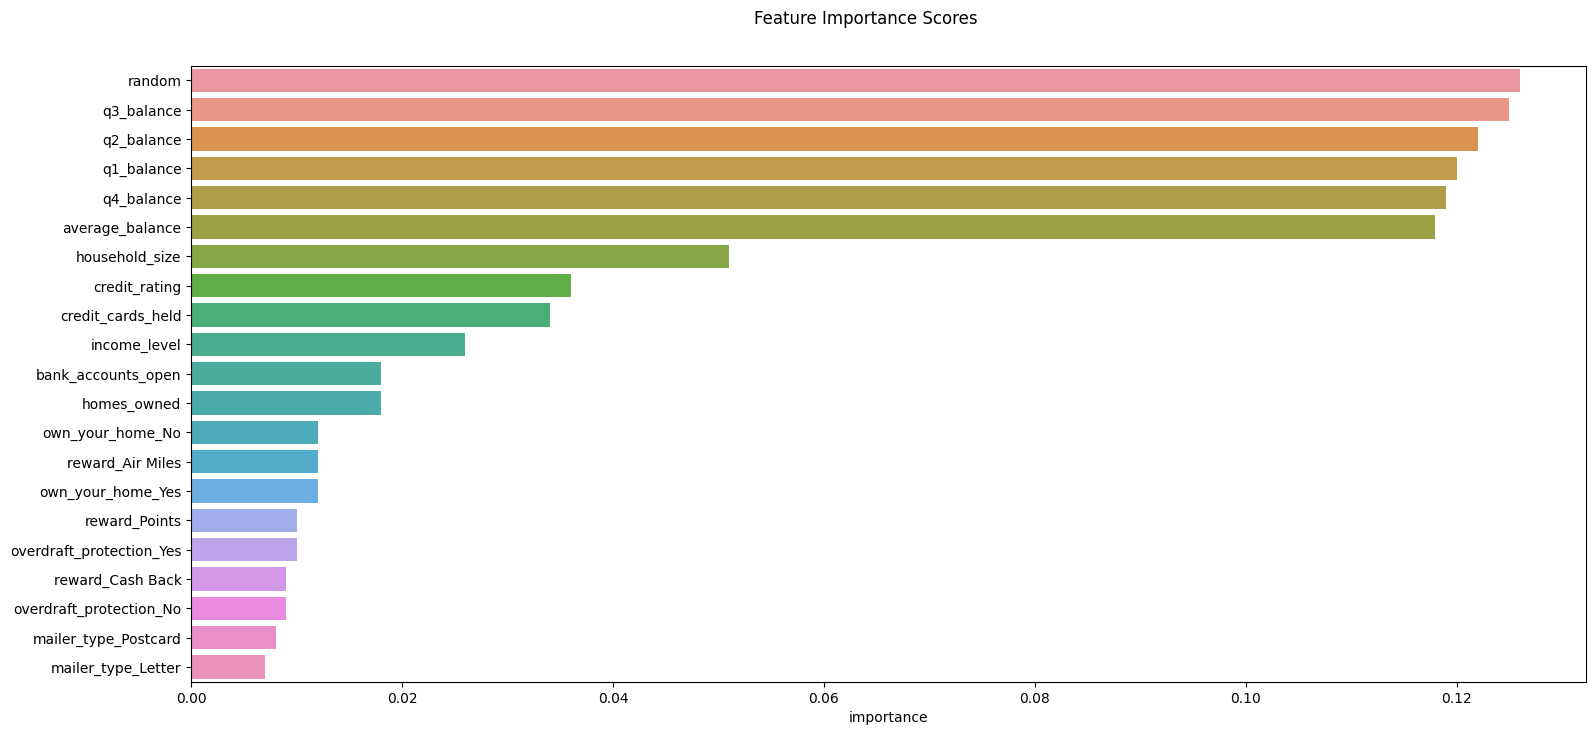

In [ ]:
plot_importance(imp_rf)

> **Note:** Feature importance shows that the random variable is more important than the other features from the dataset which doesn't make sense. We will check permutation importance instead to see if the ranking will change.
> 
> The impurity-based feature importance ranks the numerical features to be the most important features. As a result, the non-predictive random_num variable is ranked as one of the most important features!
> This problem stems from two limitations of impurity-based feature importances:
>   - impurity-based importances are biased towards high cardinality features;
>   - impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity).
> 
> The bias towards high cardinality features explains why the random_num has a really large importance



In [ ]:
from sklearn.inspection import permutation_importance
import copy

In [ ]:
def perm_importance(model, X, y):
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    train_result = permutation_importance(
        rf, X_train, y_train, n_repeats=10, random_state=1, n_jobs=2
    )
    test_results = permutation_importance(
        rf, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2
    )
    sorted_importances_idx = train_result.importances_mean.argsort()[::-1]
    train_importances = pd.DataFrame(
        train_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    test_importances = pd.DataFrame(
        test_results.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    return train_importances, test_importances

In [ ]:
train_impt, test_impt = perm_importance(rf, X, y_int)

In [ ]:
train_impt

,credit_rating,q3_balance,random,q1_balance,q2_balance,average_balance,income_level,q4_balance,mailer_type_Postcard,mailer_type_Letter,...,reward_Air Miles,household_size,credit_cards_held,reward_Points,own_your_home_No,homes_owned,bank_accounts_open,own_your_home_Yes,overdraft_protection_Yes,overdraft_protection_No
0,0.037193,0.030756,0.031551,0.031868,0.029166,0.030358,0.027736,0.029166,0.028292,0.026544,...,0.021219,0.016769,0.011365,0.008504,0.007629,0.006119,0.005801,0.004848,0.003020,0.002623
1,0.037114,0.030279,0.031233,0.030199,0.029882,0.029961,0.030438,0.028848,0.026146,0.024001,...,0.020583,0.015656,0.010967,0.007788,0.007311,0.006596,0.006040,0.004212,0.003179,0.002702
2,0.037908,0.031868,0.031312,0.029961,0.030438,0.030199,0.028690,0.028292,0.024398,0.022888,...,0.020186,0.015179,0.010729,0.008106,0.007629,0.006596,0.005484,0.004450,0.003576,0.002940
3,0.037193,0.031948,0.031233,0.031153,0.030438,0.029564,0.028213,0.027815,0.027815,0.026067,...,0.021458,0.015736,0.011365,0.008821,0.007391,0.006676,0.005801,0.005086,0.003338,0.003815
4,0.038226,0.032186,0.031233,0.031471,0.030041,0.028372,0.032822,0.029564,0.026941,0.025193,...,0.020345,0.016530,0.010570,0.008583,0.006358,0.006199,0.005881,0.004212,0.003179,0.003258
5,0.036557,0.033140,0.029882,0.030199,0.029723,0.028531,0.029166,0.028133,0.028769,0.027100,...,0.019471,0.016212,0.011206,0.007868,0.007868,0.005404,0.005563,0.005166,0.002623,0.002940
6,0.039021,0.031630,0.030915,0.031709,0.030358,0.030915,0.030120,0.028054,0.027656,0.026623,...,0.021060,0.016053,0.012080,0.007788,0.007629,0.006596,0.005722,0.004848,0.003179,0.002861
7,0.036478,0.032027,0.031312,0.030120,0.030915,0.028690,0.030279,0.029007,0.026862,0.024716,...,0.019948,0.016133,0.011921,0.007232,0.007153,0.006437,0.005245,0.004133,0.003099,0.003020
8,0.038385,0.032504,0.030517,0.031630,0.029246,0.029643,0.028372,0.028928,0.027815,0.025908,...,0.019948,0.016212,0.011603,0.008027,0.007470,0.006358,0.006358,0.005325,0.003417,0.003099
9,0.038226,0.033458,0.031153,0.031153,0.029961,0.030041,0.029882,0.028133,0.026385,0.025113,...,0.020265,0.017166,0.010490,0.007868,0.008424,0.005484,0.005722,0.004848,0.002861,0.002623


In [ ]:
test_impt

,credit_rating,q3_balance,random,q1_balance,q2_balance,average_balance,income_level,q4_balance,mailer_type_Postcard,mailer_type_Letter,...,reward_Air Miles,household_size,credit_cards_held,reward_Points,own_your_home_No,homes_owned,bank_accounts_open,own_your_home_Yes,overdraft_protection_Yes,overdraft_protection_No
0,-0.000371,-0.000185,-0.000556,-0.000185,-0.000556,-0.000371,0.000000,-0.000185,0.000000,0.000000,...,-0.000185,-0.000371,0.000000,-0.000371,-0.000371,0.000000,-0.000185,-0.000371,0.000000,0.000000
1,-0.000371,-0.000371,0.000000,-0.000371,-0.000556,-0.000556,-0.000371,-0.000371,-0.000371,-0.000371,...,0.000000,-0.000371,0.000000,-0.000371,-0.000185,0.000000,-0.000371,-0.000185,0.000000,0.000000
2,-0.000185,-0.000556,-0.000371,-0.000556,-0.000556,-0.000185,-0.000371,-0.000185,-0.000371,-0.000371,...,-0.000185,-0.000371,-0.000185,-0.000556,0.000000,-0.000185,-0.000185,0.000000,0.000000,0.000000
3,-0.000185,-0.000185,-0.000185,-0.000185,-0.000371,-0.000371,-0.000185,-0.000371,-0.000556,-0.000556,...,-0.000185,-0.000185,0.000000,-0.000185,-0.000556,0.000185,-0.000371,-0.000556,-0.000185,0.000000
4,-0.000371,-0.000371,-0.000185,-0.000185,-0.000556,-0.000371,-0.000371,-0.000185,-0.000371,-0.000371,...,-0.000185,-0.000371,0.000000,-0.000371,-0.000556,0.000185,-0.000371,-0.000556,0.000000,-0.000185
5,-0.000371,-0.000371,-0.000185,-0.000556,-0.000556,-0.000371,-0.000185,-0.000185,-0.000185,-0.000185,...,-0.000185,0.000000,-0.000185,-0.000556,0.000000,0.000000,-0.000185,0.000000,0.000000,0.000000
6,-0.000185,-0.000185,-0.000371,-0.000556,-0.000556,-0.000556,-0.000371,-0.000371,-0.000185,-0.000185,...,0.000000,-0.000185,0.000000,-0.000185,-0.000556,0.000000,-0.000371,-0.000556,0.000000,0.000000
7,-0.000185,0.000000,-0.000185,-0.000371,-0.000371,-0.000556,-0.000371,-0.000556,-0.000371,-0.000371,...,-0.000185,-0.000371,-0.000371,-0.000556,0.000000,0.000000,-0.000185,0.000000,0.000000,-0.000185
8,-0.000371,0.000000,0.000371,-0.000185,-0.000556,-0.000556,-0.000371,-0.000371,0.000000,0.000000,...,-0.000185,-0.000185,0.000000,-0.000371,-0.000185,0.000000,-0.000185,-0.000185,0.000000,0.000000
9,-0.000371,-0.000556,-0.000371,-0.000556,-0.000371,-0.000371,0.000000,-0.000185,-0.000556,-0.000556,...,-0.000185,-0.000371,-0.000185,0.000000,-0.000556,0.000000,-0.000185,-0.000556,0.000000,0.000000


In [ ]:
def plot_perm_impt(train_impt, test_impt):
    fig = plt.figure(figsize = (14,7))
    plt.suptitle("Permutation Importances", fontsize = 14, y=1)

    #  subplot #1
    plt.subplot(121)
    plt.title('Train Set')
    plt.xlabel("Decrease in accuracy score")
    ax = sns.boxplot(train_impt, orient='h', whis=10)
    ax.axvline(x=0, color="k", linestyle="--")
    
    #  subplot #2
    plt.subplot(122)
    plt.title('Test Set')
    plt.xlabel("Decrease in accuracy score")
    ax = sns.boxplot(test_impt, orient='h', whis=10)
    ax.axvline(x=0, color="k", linestyle="--")
    
    plt.tight_layout()
    plt.show()

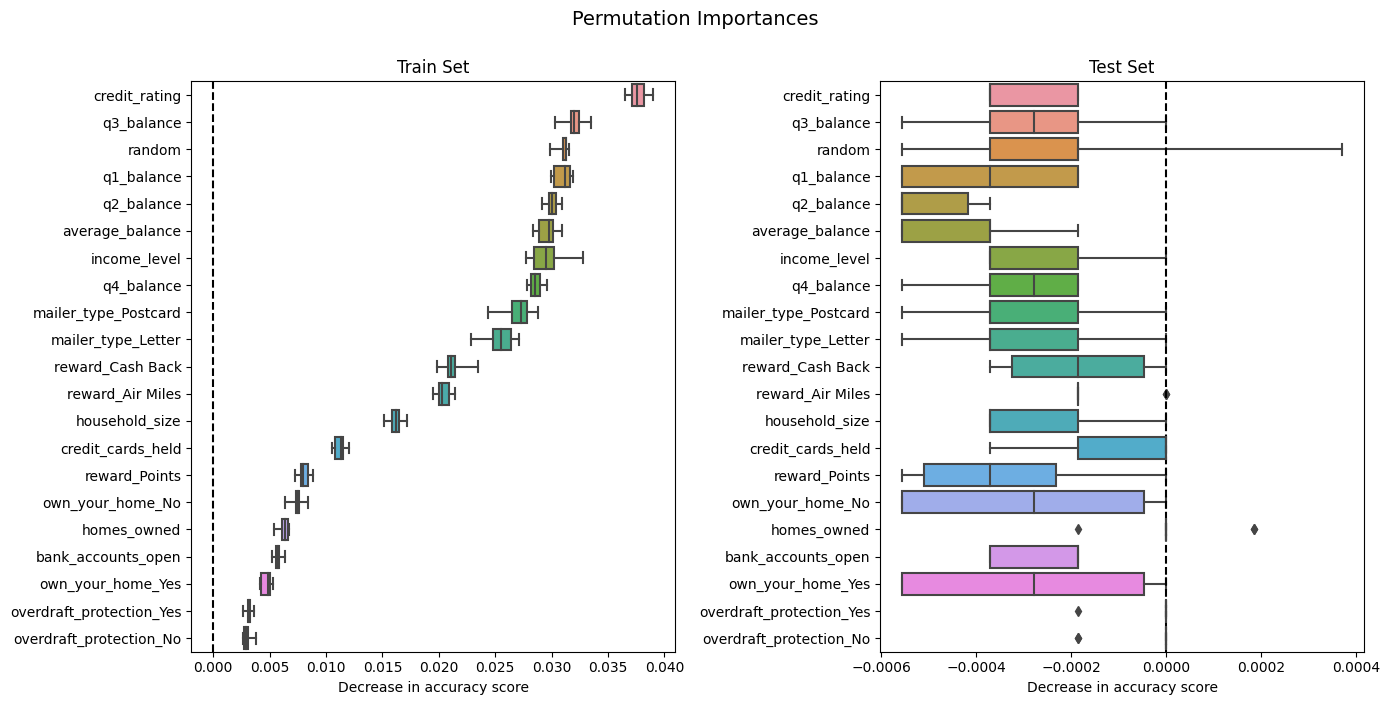

In [ ]:
plot_perm_impt(train_impt, test_impt)

#### With SMOTE Dataset

In [ ]:
rf.fit(Xsm_train,ysm_train)
sm_rf_pred = rf.predict(Xsm_test)
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(Xsm_train, ysm_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(Xsm_test, ysm_test)))

R^2 Training Score: 1.00 
OOB Score: 0.97 
R^2 Validation Score: 0.97


In [ ]:
rf_metric_sm = metrics_class(ysm_test, sm_rf_pred)
rf_metric_sm

Cohen Kappa Score    0.94
Accuracy             0.97
Precision            0.97
Recall               0.96
F1                   0.97
AUC Score            0.97
dtype: float64

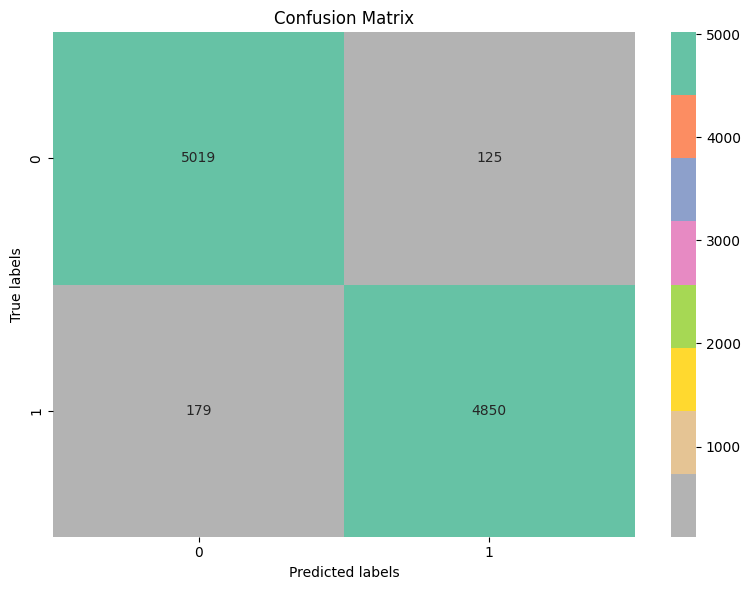

In [ ]:
plot_cm(ysm_test, sm_rf_pred)

In [ ]:
sm_imp_rf = importance(rf)
sm_imp_rf

,importance
credit_rating,0.230
income_level,0.123
household_size,0.093
credit_cards_held,0.079
q4_balance,0.056
q2_balance,0.055
q1_balance,0.054
q3_balance,0.053
average_balance,0.052
random,0.028


<Axes: xlabel='importance'>

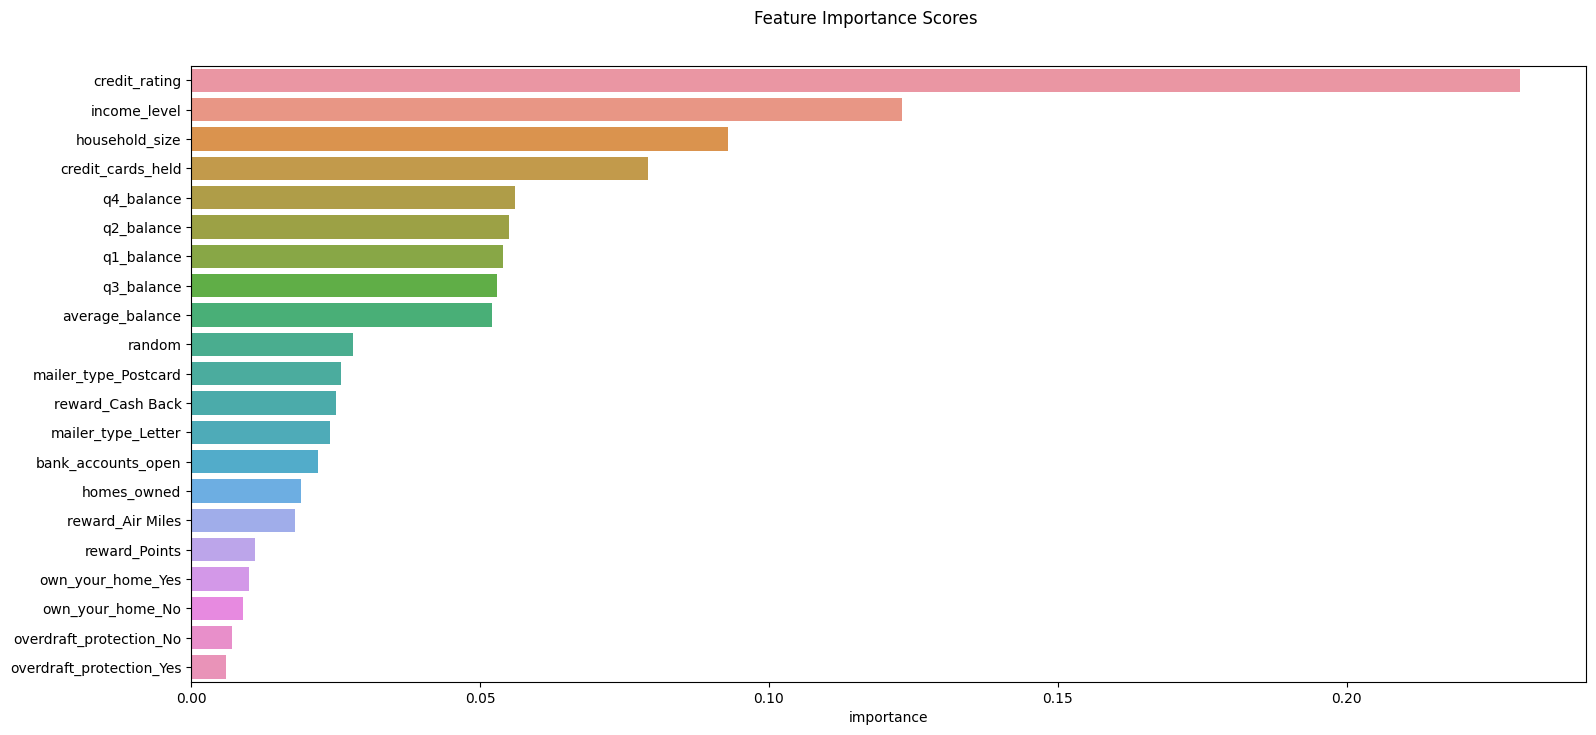

In [ ]:
plot_importance(sm_imp_rf)

In [ ]:
sm_train_impt, sm_test_impt = perm_importance(rf, X_sm, y_sm)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


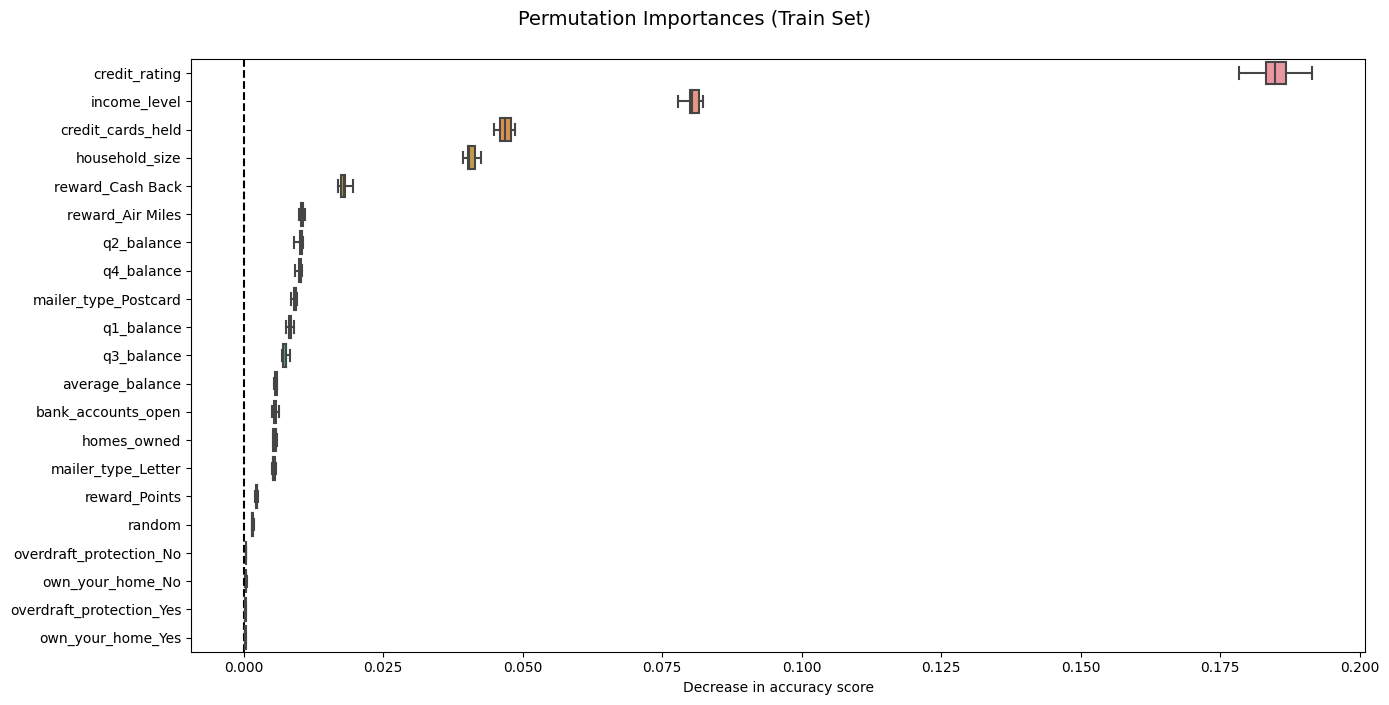

In [ ]:
fig = plt.figure(figsize = (14,7))
plt.suptitle("Permutation Importances (Train Set)", fontsize = 14, y=1)
plt.xlabel("Decrease in accuracy score")
ax = sns.boxplot(sm_train_impt, orient='h', whis=10)
ax.axvline(x=0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

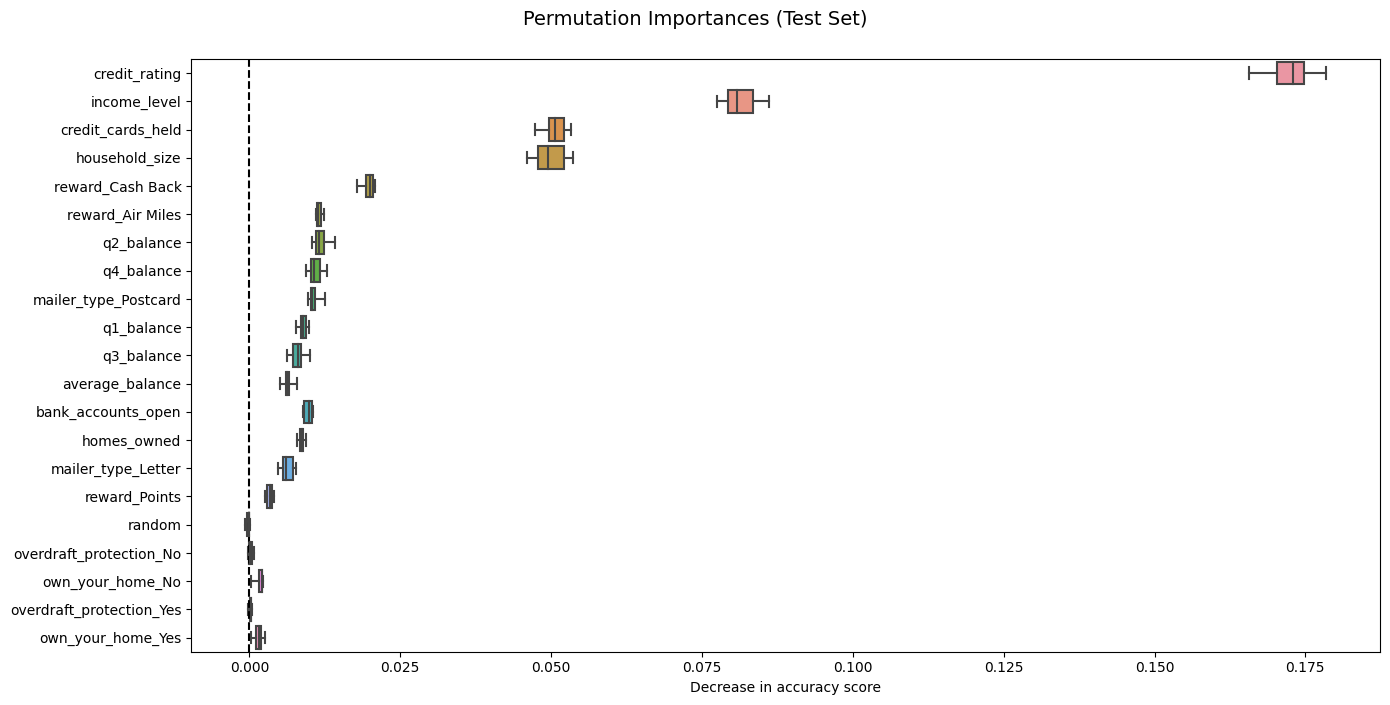

In [ ]:
fig = plt.figure(figsize = (14,7))
plt.suptitle("Permutation Importances (Test Set)", fontsize = 14, y=1)
plt.xlabel("Decrease in accuracy score")
ax = sns.boxplot(sm_test_impt, orient='h', whis=10)
ax.axvline(x=0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

In [ ]:
# X with no quarter balances to avoid mulitcollinearity
Xsm_avg = X_sm.drop(columns=['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'])
Xsm_avg

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes,random
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.410295,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0.697802
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0.414357
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,1.410295,-0.007894,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147,0.838610
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,-0.005039,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0.473334
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0.557654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,0.365992,1.406778,1.171654,-2.006040,-1.144176,0.230839,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744,0.562379
33906,-0.541352,0.121161,-0.476212,-1.339703,0.509354,-1.420373,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0.782506
33907,-0.541352,-0.742960,-0.476212,-1.345162,0.100980,-0.445548,-0.850492,-0.711980,1.413683,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352,0.357183
33908,-0.541352,0.121161,-0.476212,0.207690,0.117587,0.376295,-0.337504,-0.711980,-0.707372,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0.140635


In [ ]:
Xsm_avg_train, Xsm_avg_test, ysm_train, ysm_test = train_test_split(Xsm_avg, y_sm, random_state=100, test_size=0.3)

In [ ]:
rf.fit(Xsm_avg_train,ysm_train)
sm_avg_rfpred = rf.predict(Xsm_avg_test)
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(Xsm_avg_train, ysm_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(Xsm_avg_test, ysm_test)))

R^2 Training Score: 1.00 
OOB Score: 0.95 
R^2 Validation Score: 0.96


In [ ]:
rf_metrics_avg = metrics_class(ysm_test, sm_avg_rfpred)
rf_metrics_avg

Cohen Kappa Score    0.92
Accuracy             0.96
Precision            0.97
Recall               0.95
F1                   0.96
AUC Score            0.96
dtype: float64

In [ ]:
avgtrain_impt, avgtest_impt = perm_importance(rf, Xsm_avg, y_sm)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


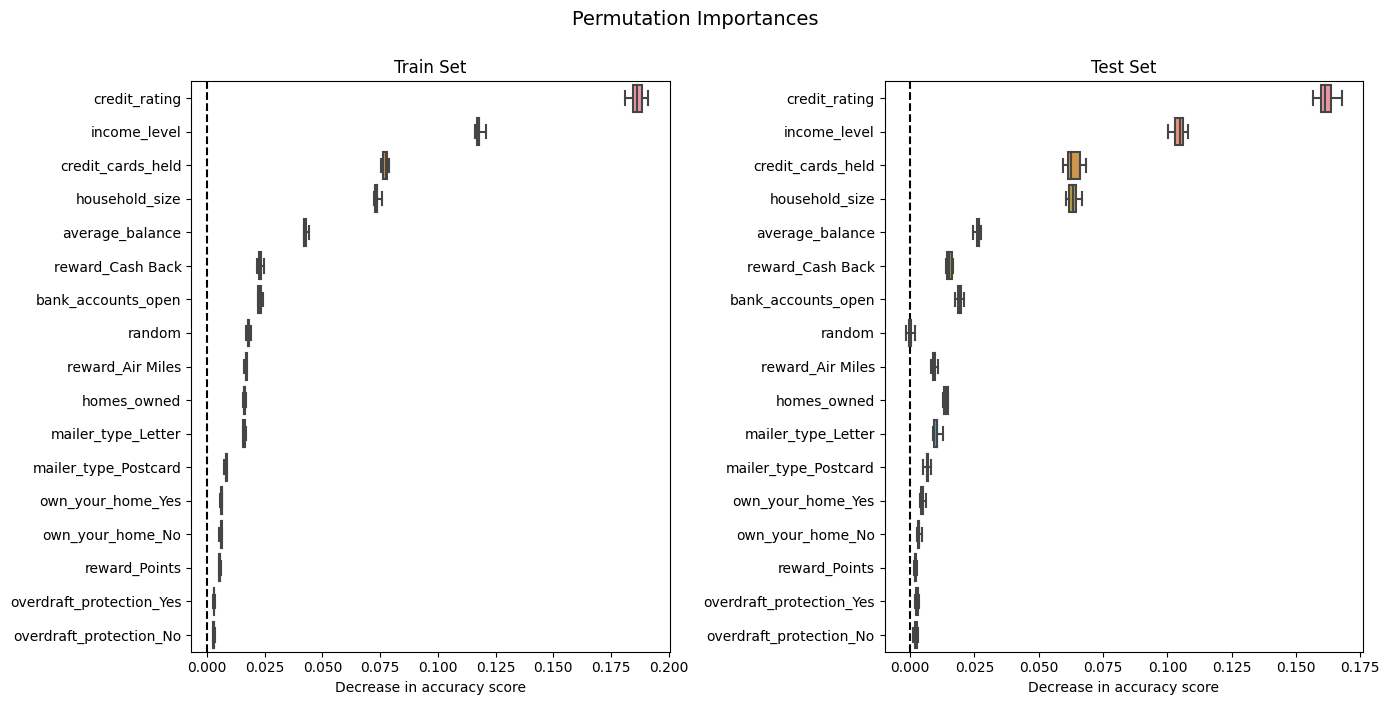

In [ ]:
plot_perm_impt(avgtrain_impt, avgtest_impt)

### KNN

In [ ]:

#data handling and transformation
import pandas as pd
import numpy as np

# data visualisation 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
import plotly.graph_objects as go
import plotly.express as px



# machine learning metrics and scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2,  f_classif


# machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier # knn modeling 

import warnings

warnings.filterwarnings('ignore')


In [ ]:


#import oversampled data with StandardScaler applied
oversampled_data = pd.read_csv(r'./../data/oversampled_data.csv') # import the csv file using a relative path to the 'data' folder

# convert yes and no to 1 and 0
oversampled_data['offer_accepted'] = oversampled_data['offer_accepted'].replace({'No': 0, 'Yes': 1}) 


oversampled_data.head()


,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,...,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes,offer_accepted
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,...,1.404533,-0.707372,-0.70198,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147,0
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0


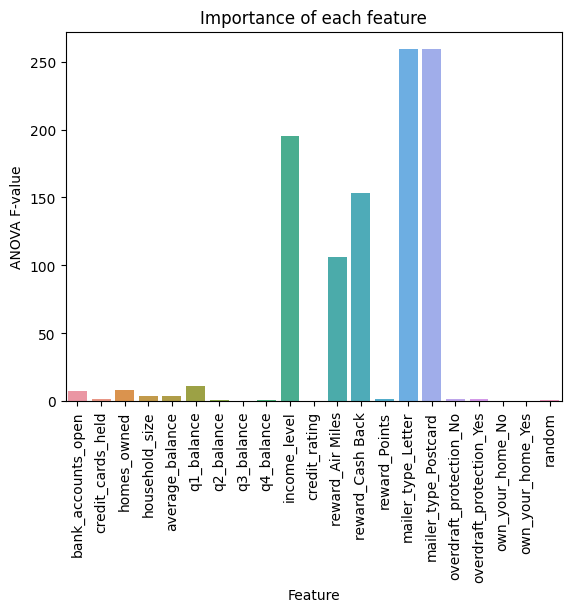

In [ ]:
# Analyze for feature importance using ANOVA F-value
selector = SelectKBest(f_classif, k='all')
selector.fit(Xsm_train, ysm_train)
scores = -np.log10(selector.pvalues_)

# Create a dataframe for plotting
scores_df = pd.DataFrame({'feature': Xsm_train.columns, 'score': scores})

# Plot the bar chart using seaborn
sns.barplot(x='feature', y='score', data=scores_df)
plt.title('Importance of each feature')
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.show()

Low ANOVA (Analysis of variance) F-values may indicate a weak relationship between a feature and the target variable, 'offer accepted'. 

They could be dropped if our model does not perform well. 

In [ ]:

# Create an empty list to store accuracy values for different values of k
accuracy_scores = []

# Create a range of k values to test
k_values = range(1, 21)

# Iterate over the k values
for k in k_values:
    # Create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(Xsm_train, ysm_train)

    # Use the trained classifier to predict labels for the test data
    sm_knn_pred = knn.predict(Xsm_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(ysm_test, sm_knn_pred)

    # Append the accuracy to the list
    accuracy_scores.append(accuracy)

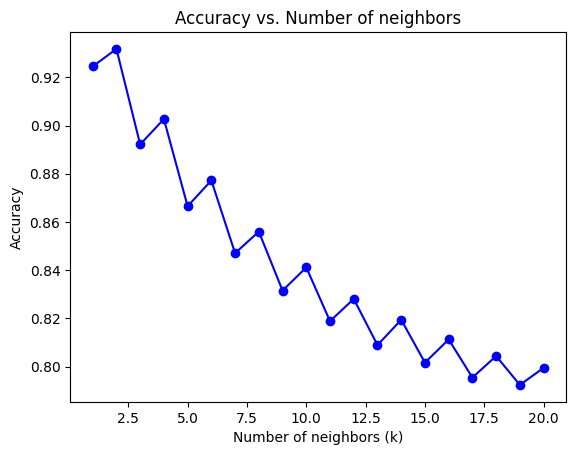

In [ ]:

# Plot the accuracy scores for different values of k
plt.plot(k_values, accuracy_scores, 'bo-')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of neighbors')
plt.show()

In [ ]:

# Find the value of k that gives the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best value of k is: {best_k}")

The best value of k is: 2


In [ ]:


# Train a k-NN classifier with the best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(Xsm_train, ysm_train)
sm_y_pred = knn.predict(Xsm_test)

In [ ]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(ysm_test, sm_y_pred)
print(f"The accuracy of the classifier with a k of  {best_k} is: {accuracy:.2%}")

The accuracy of the classifier with a k of  2 is: 93.18%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix and classification report for best k
knn = classification_report(ysm_test, sm_y_pred)
print("Classification report for knn5:\n", knn)

Classification report for knn5:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      5144
           1       0.89      0.98      0.93      5029

    accuracy                           0.93     10173
   macro avg       0.94      0.93      0.93     10173
weighted avg       0.94      0.93      0.93     10173



The KNN model appears to have performed reasonably well on the test set. The MAE and RMSE are relatively low, indicating that the model's predictions are fairly accurate. 

The R2 value of 0.69 suggests that the model explains about 69% of the variation in the dependent variable.

In [ ]:
#model = LogisticRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

accuracy = accuracy_score(ysm_test, sm_y_pred)
precision = precision_score(ysm_test, sm_y_pred)
recall = recall_score(ysm_test, sm_y_pred)
f1 = f1_score(ysm_test, sm_y_pred)
roc_auc = roc_auc_score(ysm_test, sm_y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("AUC-ROC score: {:.2f}".format(roc_auc))

Accuracy: 0.93
Precision: 0.89
Recall: 0.98
F1-score: 0.93
AUC-ROC score: 0.93


Based on the scores, the model appears to have good overall performance:


Accuracy: The accuracy score of 0.93 means that the model correctly classified 93% of the total instances, indicating that the model is performing well in terms of overall classification.


Precision: The precision score of 0.89 indicates that out of all the instances that the model predicted as positive, 89% of them were actually positive, suggesting that the model is doing a good job in predicting true positives.

Recall: The recall score of 0.98 indicates that out of all the actual positive instances, the model was able to correctly identify 98% of them, which indicates that the model is good at detecting actual positives.

F1-score: The F1-score of 0.94 indicates that the model is able to achieve a good balance between precision and recall, which means that the model is able to perform well in terms of both positive and negative classifications.

AUC-ROC score: The AUC-ROC score of 0.93 indicates that the model is able to distinguish between positive and negative classes with good accuracy, making it a reliable model.

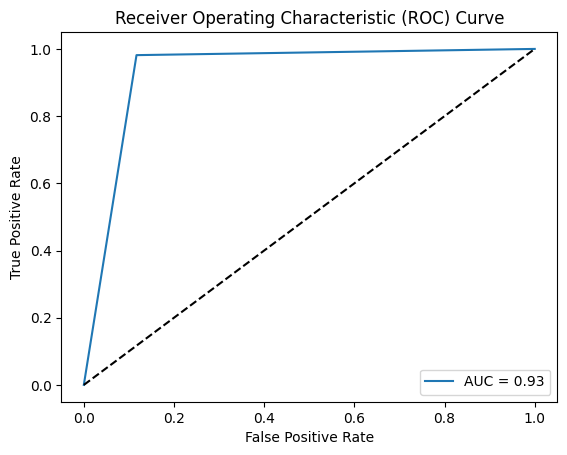

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ysm_test, sm_y_pred)
roc_auc = roc_auc_score(ysm_test, sm_y_pred)

# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is:\n{cm}")

NameError: name 'y_pred' is not defined

The top-left quadrant represents the true negatives (TN): 4563. This means that the model correctly predicted 4563 times that the offer would be refused (actual value of 0) and it was indeed refused.

The top-right quadrant represents the false positives (FP): 581. This means that the model incorrectly predicted 581 times that the offer would be accepted (actual value of 1) when it was actually refused.

The bottom-left quadrant represents the false negatives (FN): 88. This means that the model incorrectly predicted 88 times that the offer would be refused (actual value of 0) when it was actually accepted.
    
The bottom-right quadrant represents the true positives (TP): 4941. This means that the model correctly predicted 4941 times that the offer would be accepted (actual value of 1) and it was indeed accepted.

Overall, the confusion matrix indicates that the model has a high accuracy since most of the values are in the true positives and true negatives quadrants. However, the model has a relatively high number of false positives, which could be an area of improvement.

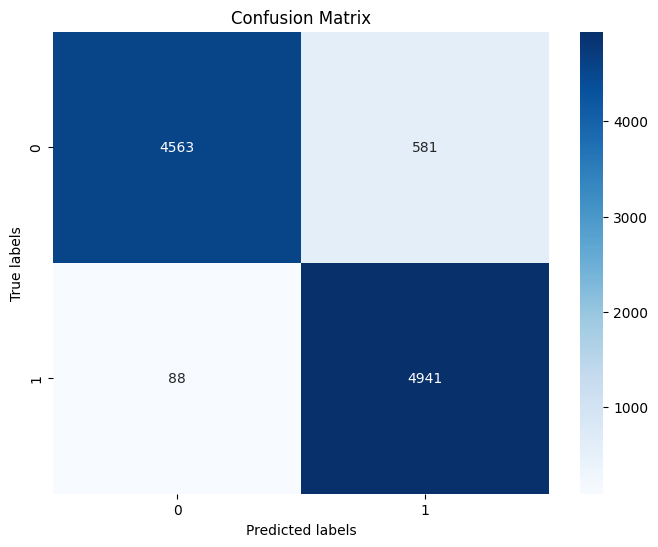

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set axis labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()


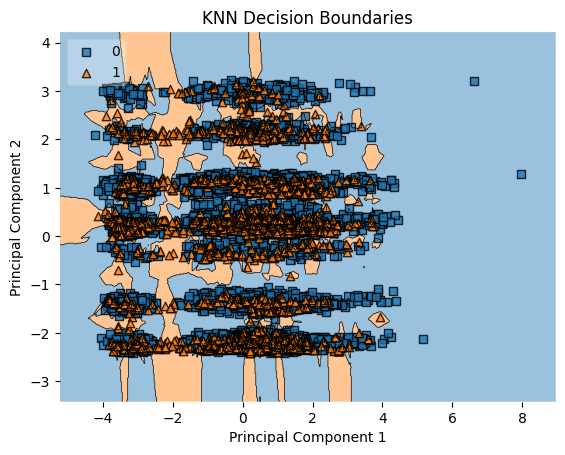

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Set a color blind friendly palette
sns.set_palette('colorblind')

# Fit PCA to the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Fit KNN to the transformed data
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_pca, y_train)

# Predict on the test data and transform using PCA
X_test_pca = pca.transform(X_test)
y_pred = knn.predict(X_test_pca)

# Plot the decision boundaries
plot_decision_regions(X_test_pca, y_pred, clf=knn, legend=2)

# Add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries')
plt.show()


Interpreting a decision boundary graph involves understanding where the boundary lies and how well it separates the classes. 

A **good boundary** will lie in a way that creates a clear separation between the classes, while a **bad boundary** will be messy and not clearly distinguish the classes.

The decision boundary graph can help to identify areas where the algorithm may have difficulty correctly classifying instances. In this graph, we can see some places where the boundaries are unclear or where there is a lot of overlap between the two classes. 
 

Scratch paper

In [ ]:
list(oversampled_data.columns)

If the decision boundary is a straight line or hyperplane, the classifier is said to be a linear classifier. If the decision boundary is a curve or a more complex shape, the classifier is said to be a non-linear classifier.

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dt_entropy_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, rf_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

ValueError: Found input variables with inconsistent numbers of samples: [10173, 5393]

### KNN Original Dataset

In [ ]:

#data handling and transformation
import pandas as pd
import numpy as np

# data visualisation 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
import plotly.graph_objects as go
import plotly.express as px



# machine learning metrics and scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2,  f_classif


# machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier # knn modeling 

import warnings

warnings.filterwarnings('ignore')


In [ ]:
# import independent variables with original samples
X = pd.read_csv(r'./../data/X.csv') # import the csv file using a relative path to the 'data' folder


# import dependent variables 
y = pd.read_csv(r'./../data/y.csv') # import the csv file using a relative path to the 'data' folder
#y= y.drop(columns=['Unnamed: 0']) # drop index column
y['offer_accepted'] = y['offer_accepted'].replace({'No': 0, 'Yes': 1}) 



In [ ]:
X.head()


,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1


In [ ]:

y.head()


,offer_accepted
0,0
1,0
2,0
3,0
4,0


In [ ]:
independents = X.copy() # make a separate df to preserve the column headers

transformer = StandardScaler().fit(independents)
standard_x = transformer.transform(independents)
X = pd.DataFrame(standard_x)
X.columns = independents.columns # put the column headers back
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,1.215460,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,-0.007894,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,-0.007894,1.404533,-0.707372,-0.70198,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,1.215460,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,-0.007894,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

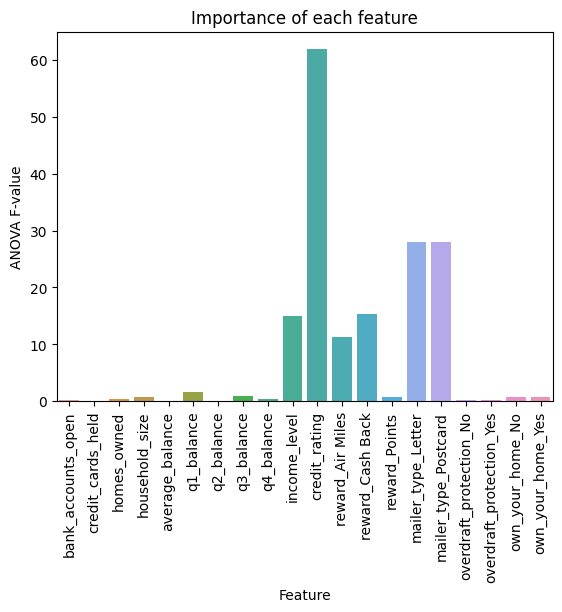

In [ ]:
# Analyze for feature importance using ANOVA F-value
selector = SelectKBest(f_classif, k='all')
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)

# Create a dataframe for plotting
scores_df = pd.DataFrame({'feature': X_train.columns, 'score': scores})

# Plot the bar chart using seaborn
sns.barplot(x='feature', y='score', data=scores_df)
plt.title('Importance of each feature')
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.show()

Low ANOVA (Analysis of variance) F-values may indicate a weak relationship between a feature and the target variable, 'offer accepted'. 

They could be dropped if our model does not perform well. 

In [ ]:

# Create an empty list to store accuracy values for different values of k
accuracy_scores = []

# Create a range of k values to test
k_values = range(1, 21)

# Iterate over the k values
for k in k_values:
    # Create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Use the trained classifier to predict labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracy_scores.append(accuracy)

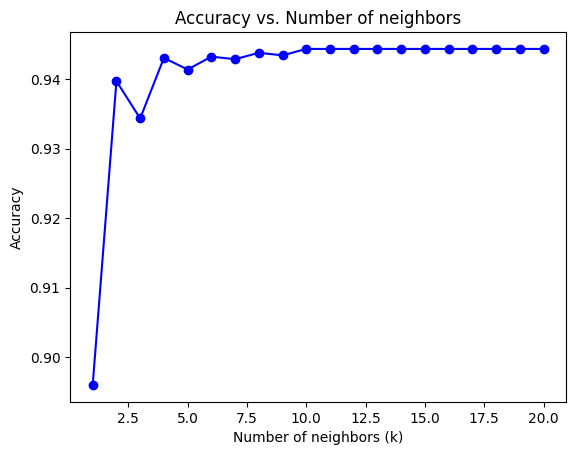

In [ ]:

# Plot the accuracy scores for different values of k
plt.plot(k_values, accuracy_scores, 'bo-')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of neighbors')
plt.show()

In [ ]:

# Find the value of k that gives the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best value of k is: {best_k}")

The best value of k is: 10


In [ ]:


# Train a k-NN classifier with the best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the classifier with a k of  {best_k} is: {accuracy:.2%}")

The accuracy of the classifier with a k of  2 is: 93.97%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix and classification report for best k
knn = classification_report(y_test, y_pred)
print("Classification report for knn 10:\n", knn)

Classification report for knn 10:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      5093
           1       0.14      0.02      0.03       300

    accuracy                           0.94      5393
   macro avg       0.54      0.51      0.50      5393
weighted avg       0.90      0.94      0.92      5393



In [ ]:
knn_reg12 = KNeighborsRegressor(n_neighbors=10)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

MAE = mean_absolute_error(y_test,y_pred12)
MSE = mean_squared_error(y_test,y_pred12)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred12)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean absolute error of the model in the test set is: " , MAE)
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.10
The mean absolute error of the model in the test set is:  0.10101984053402557
The mean squared error of the model in the test set is:   0.06
The root mean squared error of the model in the test set is:   0.24
The R2 of the model in the test set is: -0.06


The KNN model appears to have performed reasonably well on the test set. The MAE and RMSE are relatively low, indicating that the model's predictions are fairly accurate. 

The R2 value of -0.06 suggests that the model explains less than 1% of the variation in the dependent variable. So, not very good at predicting at all!

In [ ]:
#model = LogisticRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("AUC-ROC score: {:.2f}".format(roc_auc))

Accuracy: 0.94
Precision: 0.14
Recall: 0.02
F1-score: 0.03
AUC-ROC score: 0.51


Based on the scores, the model appears to less than adequate performance:


Accuracy: The accuracy score of 0.94 means that the model correctly classified 94% of the total instances, indicating that the model is performing well in terms of overall classification.


Precision: The precision score of 0.00 indicates that out of all the instances that the model predicted as positive, 0% of them were actually positive, suggesting that the model is doing a terrible job in predicting true positives.

Recall: The recall score of 0.00 indicates that out of all the actual positive instances, the model was able to correctly identify 0% of them, which indicates that the model is not very good at detecting actual positives.

F1-score: The F1-score of 0.00 indicates that the model is unable to achieve a good balance between precision and recall, which means that the model is unable to perform well in terms of both positive and negative classifications.

AUC-ROC score: The AUC-ROC score of 0.50 indicates that the model is able to distinguish between positive and negative classes half of the time - making its accuracy very hit or miss. 

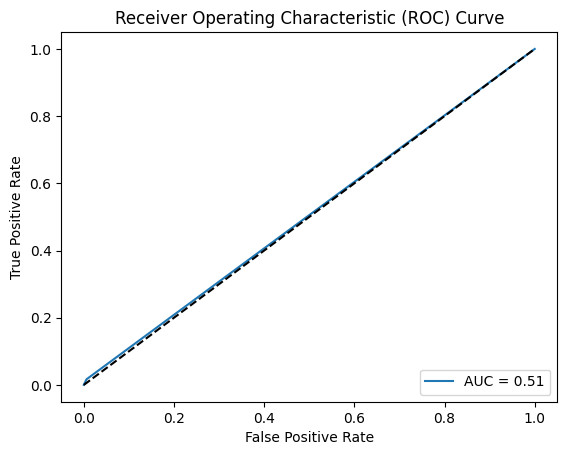

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is:\n{cm}")

The confusion matrix is:
[[5093    0]
 [ 300    0]]


The top-left quadrant represents the true negatives (TN): 5903. This means that the model correctly predicted 5903 times that the offer would be refused (actual value of 0) and it was indeed refused.

The top-right quadrant represents the false positives (FP): 0. This means that the model incorrectly predicted 581 times that the offer would be accepted (actual value of 1) when it was actually refused.

The bottom-left quadrant represents the false negatives (FN): 300. This means that the model incorrectly predicted 300 times that the offer would be refused (actual value of 0) when it was actually accepted.
    
The bottom-right quadrant represents the true positives (TP): 0. This means that the model correctly predicted 0 times that the offer would be accepted (actual value of 1) and it was indeed accepted.

Overall, the confusion matrix indicates that the model is very accurate at predicting when people will refuse, but very bad at predicting when people will accept - making it not particularly useful as we want to know when people will say 'yes' to a credit card. 

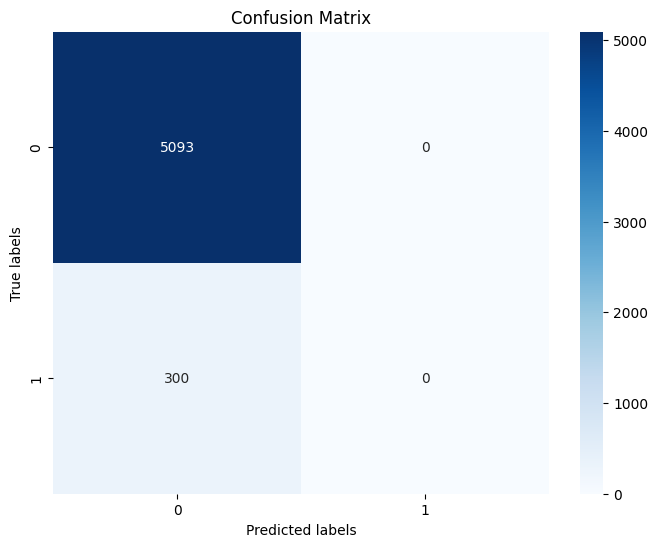

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set axis labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()


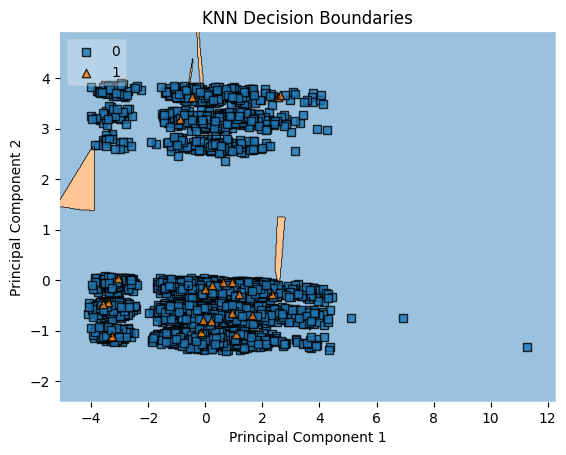

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Fit PCA to the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Fit KNN to the transformed data
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_pca, y_train)

# Predict on the test data and transform using PCA
X_test_pca = pca.transform(X_test)
y_pred = knn.predict(X_test_pca)

# Plot the decision boundaries
plot_decision_regions(X_test_pca, y_pred, clf=knn, legend=2)

# Add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries')
plt.show()


If the decision boundary is a straight line or hyperplane, the classifier is said to be a linear classifier. If the decision boundary is a curve or a more complex shape, the classifier is said to be a non-linear classifier.

Interpreting a decision boundary graph involves understanding where the boundary lies and how well it separates the classes. 

A **good boundary** will lie in a way that creates a clear separation between the classes, while a **bad boundary** will be messy and not clearly distinguish the classes.

The decision boundary graph can help to identify areas where the algorithm may have difficulty correctly classifying instances. In this graph, we can see where boundaries are fuzzy or where there is a lot of overlap between the two classes. 

As you can see in this graph, there is a great deal of overlap and the boundaries are not clear. This makes it a model that does not allow us to classify with much accuracy. 

Scratch paper

In [ ]:
list(oversampled_data.columns)

In [ ]:
# roc curve for models
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dt_entropy_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, rf_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

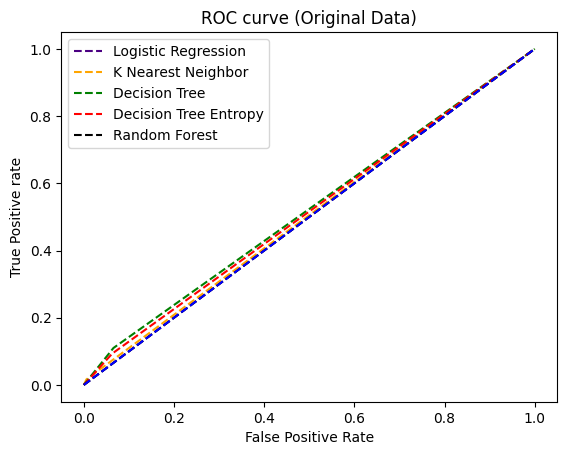

In [ ]:
plt.plot(fpr1, tpr1, linestyle='--',color='indigo', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='K Nearest Neighbor')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Entropy')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve (Original Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_original',dpi=300)
plt.show();

In [ ]:
def roc(actual, prediction):
    fpr, tpr, thresh = roc_curve(actual, prediction)
    roc_score = roc_auc_score(actual, prediction)

In [1]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ysm_test, sm_log_pred)
fpr2, tpr2, thresh2 = roc_curve(ysm_test, sm_dt_pred)
fpr3, tpr3, thresh3 = roc_curve(ysm_test, sm_dt_entropy_pred)
fpr4, tpr4, thresh4 = roc_curve(ysm_test, sm_rf_pred)

roc_score = roc_auc_score(ysm_test, sm_y_pred)
roc_score1 = roc_auc_score(ysm_test, sm_log_pred)
roc_score2 = roc_auc_score(ysm_test, sm_dt_pred)
roc_score3 = roc_auc_score(ysm_test, sm_dt_entropy_pred)
roc_score4 = roc_auc_score(ysm_test, sm_rf_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
roc_score_rand = roc_auc_score(y_test, random_probs)

NameError: name 'roc_curve' is not defined

In [ ]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

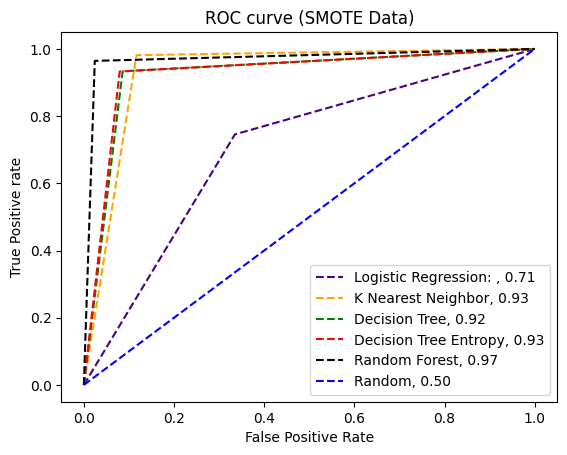

In [208]:
plt.plot(fpr1, tpr1, linestyle='--',color='indigo', label=f'Logistic Regression: , {roc_score1:.2f}')
plt.plot(fpr, tpr, linestyle='--',color='orange', label=f'K Nearest Neighbor, {roc_score:.2f}')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=f'Decision Tree, {roc_score2:.2f}')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=f'Decision Tree Entropy, {roc_score3:.2f}')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label=f'Random Forest, {roc_score4:.2f}')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label=f'Random, {roc_score_rand:.2f}')

# title
plt.title('ROC curve (SMOTE Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_smotedata',dpi=300)
plt.show();

### Importance DF

In [ ]:
importance = pd.DataFrame